In [1]:
%matplotlib notebook

%load_ext autoreload
%autoreload 2

In [2]:
import math
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from src.geometry import Pose, Position
from src.origin import origin_pose, origin_units
from src.viz import fig_3d, plot_pose, plot_origin, plot_connect_poses, \
    set_apsect_equal, setup_ax

<IPython.core.display.Javascript object>


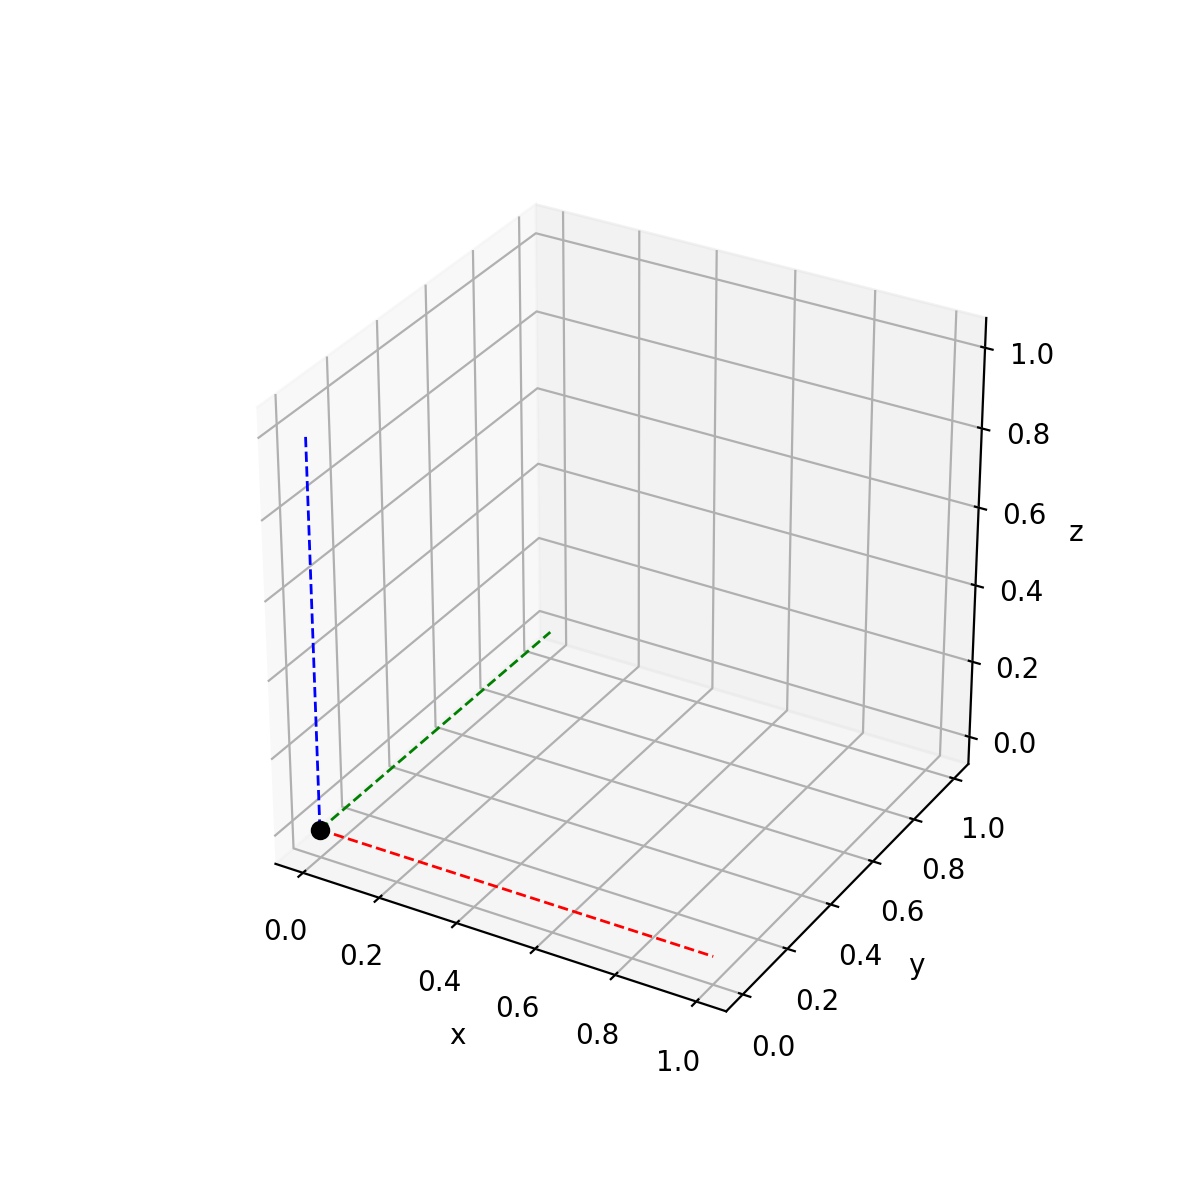

In [4]:
# Plot pose at origin
fig, ax = fig_3d()
plot_origin(ax)
set_apsect_equal(ax)
plt.show()

<IPython.core.display.Javascript object>


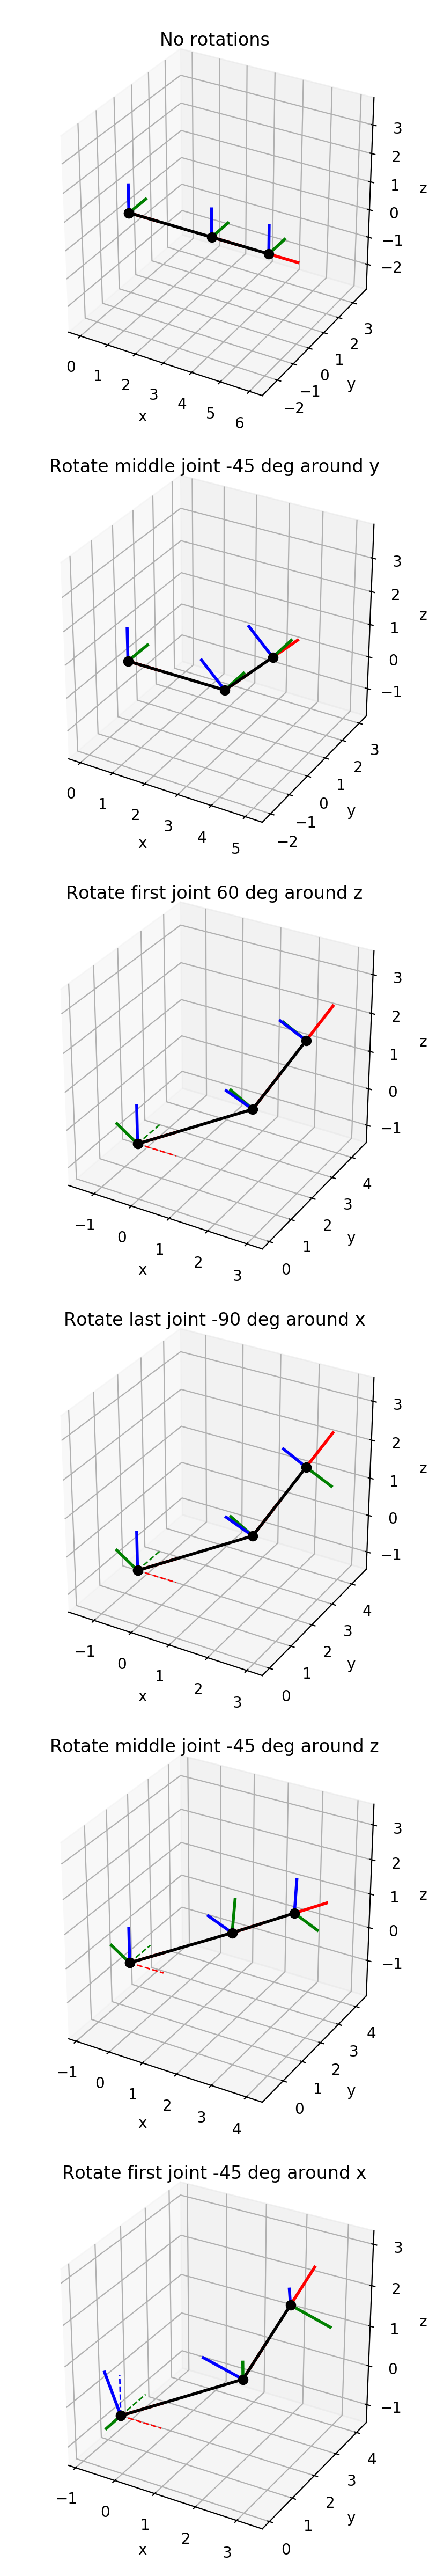

In [5]:
def plot_poses(p0, p1, p2, ax):
    setup_ax(ax)
    plot_origin(ax)
    plot_pose(p0, ax)
    plot_pose(p1, ax)
    plot_connect_poses(p0, p1, ax)
    plot_pose(p2, ax)
    plot_connect_poses(p1, p2, ax)
    set_apsect_equal(ax)

# Origin is reference frame 0
# First pose is at origin
pose_0_1 = origin_pose  # Reference frame 1 (relative to 0)
# Second pose starts along x-axis
# Relative to frame 1
v_1_2 = Position.from_vectors([[3, 0, 0]])
pose_1_2 = origin_pose + v_1_2
# Third pose starts along x-axis
# Relative to frame 2
v_2_3 = Position.from_vectors([[2, 0, 0]])
pose_2_3 = origin_pose + v_2_3


fig = plt.figure(figsize=(4, 24))


# Plot poses without rotations
pose_0_2 = pose_0_1 * pose_1_2
pose_0_3 = pose_0_2 * pose_2_3
ax1 = fig.add_subplot(6, 1, 1, projection='3d')
plot_poses(pose_0_1, pose_0_2, pose_0_3, ax1)
ax1.set_title('No rotations')

# Rotate middle joint
ax2 = fig.add_subplot(6, 1, 2, projection='3d')
pose_1_2 = pose_1_2.rot_y(math.radians(-45))
pose_0_2 = pose_0_1 * pose_1_2
pose_0_3 = pose_0_2 * pose_2_3
plot_poses(pose_0_1, pose_0_2, pose_0_3, ax2)
ax2.set_title('Rotate middle joint -45 deg around y')

# Rotate first joint
ax3 = fig.add_subplot(6, 1, 3, projection='3d')
pose_0_1 = pose_0_1.rot_z(math.radians(60))
pose_0_2 = pose_0_1 * pose_1_2
pose_0_3 = pose_0_2 * pose_2_3
plot_poses(pose_0_1, pose_0_2, pose_0_3, ax3)
ax3.set_title('Rotate first joint 60 deg around z')

# Rotate last joint
ax4 = fig.add_subplot(6, 1, 4, projection='3d')
pose_2_3 = pose_2_3.rot_x(math.radians(-90))
pose_0_2 = pose_0_1 * pose_1_2
pose_0_3 = pose_0_2 * pose_2_3
plot_poses(pose_0_1, pose_0_2, pose_0_3, ax4)
ax4.set_title('Rotate last joint -90 deg around x')

# Rotate middle joint
ax5 = fig.add_subplot(6, 1, 5, projection='3d')
pose_1_2 = pose_1_2.rot_z(math.radians(-45))
pose_0_2 = pose_0_1 * pose_1_2
pose_0_3 = pose_0_2 * pose_2_3
plot_poses(pose_0_1, pose_0_2, pose_0_3, ax5)
ax5.set_title('Rotate middle joint -45 deg around z')

# Rotate first joint
ax6 = fig.add_subplot(6, 1, 6, projection='3d')
pose_0_1 = pose_0_1.rot_x(math.radians(-45))
pose_0_2 = pose_0_1 * pose_1_2
pose_0_3 = pose_0_2 * pose_2_3
plot_poses(pose_0_1, pose_0_2, pose_0_3, ax6)
ax6.set_title('Rotate first joint -45 deg around x')

plt.tight_layout()
plt.show()